<span style="color: pink;">*_Goal: Learn to determine the redshift of a galaxy by fitting a model to the spectral feautures in its observed spectrum anbd comparing the wavelength of these features to their wavelength when they were created by the galaxy_*</span>

---

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


The Gaussian (normal distribution) equation is:

$$
f(x) = \frac{A}{\sigma\sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Where:
- f(x) is the probability density function.
- A is amplitude
- $\mu $ is the mean of the distribution. (center)
- $\sigma$  is the standard deviation. (width)
- $\sigma^2$ is the variance.


In [26]:
def gauss(x,A,mean,sig):
    gaussian = (A/sig*np.sqrt(2*np.pi))*np.exp(-((x-mean)**2)/2*(sig**2))
    return gaussian

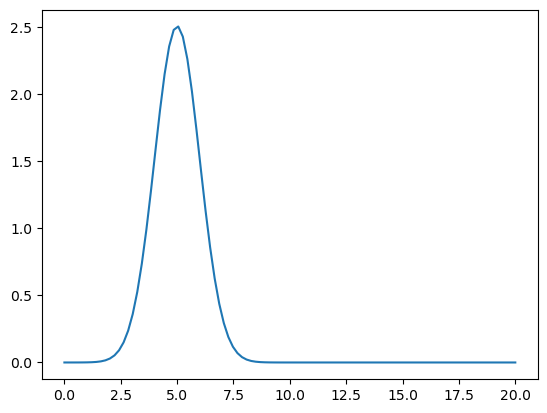

In [23]:
x_test = np.linspace(0,20,100)
guass_test = gauss(x_test,1,5,1)
plt.plot(x_test,guass_test)
plt.show()

In [31]:
def non_lin(x_val,a1,a2,m1,m2,w1,cont): # cont is the point on your axis above which u have your plot
    return gauss(x_val,a1,m1,w1) + gauss(x_val,a2,m2,w1) + cont

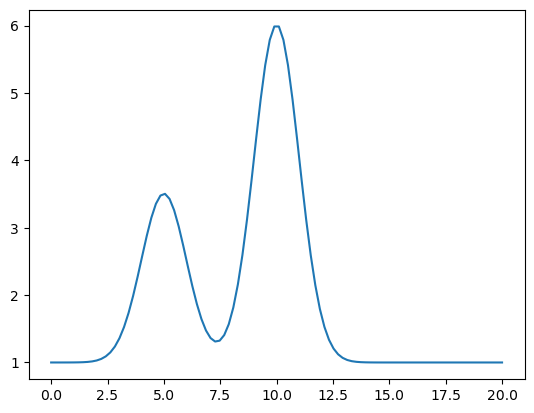

In [33]:
X_test = np.linspace(0,20,100)
Y_val = non_lin(X_test,1,2,5,10,1,1)
plt.plot(X_test,Y_val)
plt.show()

In [62]:
def fit(wave,flux,a1,a2,m1,m2,w1,cont):
    print('======================')
    print('Preforming least squares fit...')
    opt_p, cov_matrix = curve_fit(non_lin,wave,flux, p0=[a1,a2,m1,m2,w1,cont])
    err = np.sqrt(np.diag(cov_matrix))
    print('======================')
    print('Printing out the best fitting parameter and 1 std error...')
    print('A1:'+str(opt_p[0])+ 'A1_err:'+str(err[0])+'\n')
    print('A2:'+str(opt_p[1])+ 'A2_err:'+str(err[1])+'\n')
    print('wave1:'+str(opt_p[2])+ 'wave1_err:'+str(err[2])+'\n')
    print('wave2:'+str(opt_p[3])+ 'wave2_err:'+str(err[3])+'\n')
    print('width:'+str(opt_p[4])+ 'width_err:'+str(err[4])+'\n')
    print('continuum level:'+str(opt_p[5])+ 'continuum_err:'+str(err[0])+'\n')

    print('======================')
    print('Plotting the observed and modeled data...')
    
    y_model = non_lin(wave,*opt_p)
    plt.scatter(wave,flux,label='data')
    plt.plot(wave,y_model,label='model',color='r')
    plt.vlines(opt_p[2],ymin=0,ymax=flux.max(), linestyles='--', color='black',alpha=0.75,linewidth=1)
    plt.vlines(opt_p[3],ymin=0,ymax=flux.max(), linestyles='--', color='black',alpha=0.75,linewidth=1)
    plt.legend()
    plt.show()

    return opt_p, cov_matrix

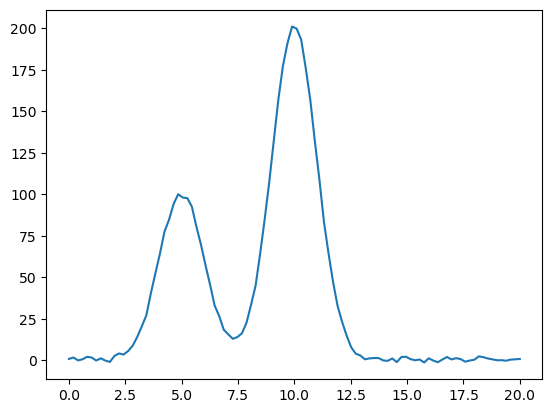

In [67]:
wave_test = np.linspace(0,20,100)
pure_model = non_lin(wave_test,20,40,5,10,1,0.25)
#adding fake noice 
test_func = pure_model + np.random.normal(loc=pure_model, size=len(pure_model))
plt.plot(wave_test,test_func)
plt.show()

Preforming least squares fit...
Printing out the best fitting parameter and 1 std error...
A1:39.89713829533055A1_err:0.18384621052975603

A2:80.17320606295225A2_err:0.2858995597907625

wave1:4.994236328116748wave1_err:0.0047658585695626995

wave2:9.996161085053101wave2_err:0.0023695306368554684

width:1.0029160781320585width_err:0.0023160515837269517

continuum level:0.6794508538054195continuum_err:0.18384621052975603

Plotting the observed and modeled data...


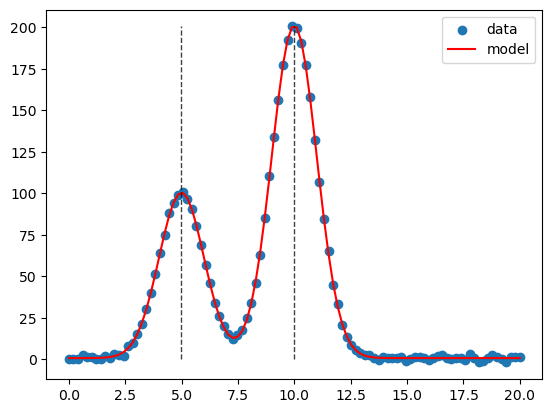

In [65]:
out_popt, out_covm = fit(wave_test,test_func,18,36,4.5,9.5,1,0.5)

## To be continued...

In [92]:
from astropy.io import fits
import scipy.signal as ss

In [69]:
from astropy.io import fits

hdul = fits.open('spec-0285-51930-0184.fits')
print(hdul[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


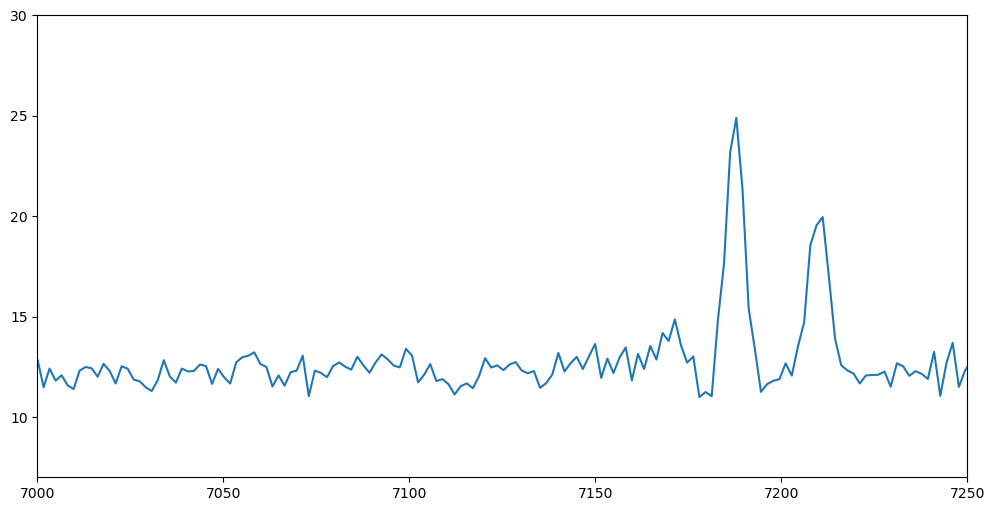

In [131]:
flux = hdul[1].data['flux']
wave = 10**hdul[1].data['loglam']
plt.figure(figsize=(12,6))
plt.ylim(7,30)
plt.xlim(7000,7250)
plt.plot(wave,flux)
plt.show()

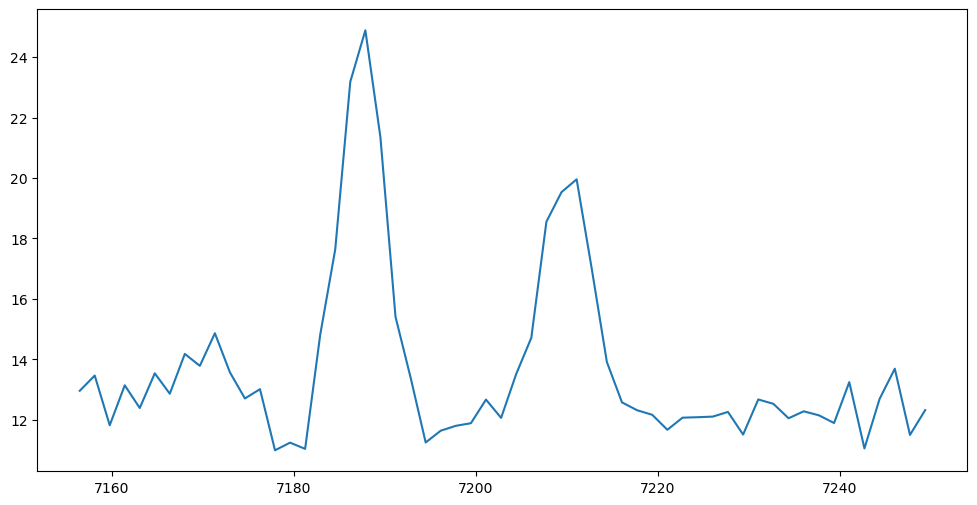

In [87]:
sub_i = np.where((wave>7155)&(wave<7250))
sub_flux = flux[sub_i]
sub_wave = wave[sub_i]

plt.figure(figsize=(12,6))
plt.plot(sub_wave,sub_flux)
plt.show()

In [119]:
flux_peaks = ss.find_peaks(sub_flux,height=18)[0] #min height guess
means= sub_wave[flux_peaks]
print(means)

[7187.867  7211.0757]


Preforming least squares fit...
Printing out the best fitting parameter and 1 std error...
A1:2.143901367947697A1_err:0.18898664684871275

A2:1.4246430194101247A2_err:0.14263180792886332

wave1:7187.5141483466405wave1_err:0.1418666653290887

wave2:7209.945409173637wave2_err:0.21379127321279276

width:0.42922985834023725width_err:0.02298724178442272

continuum level:12.424501312622734continuum_err:0.18898664684871275

Plotting the observed and modeled data...


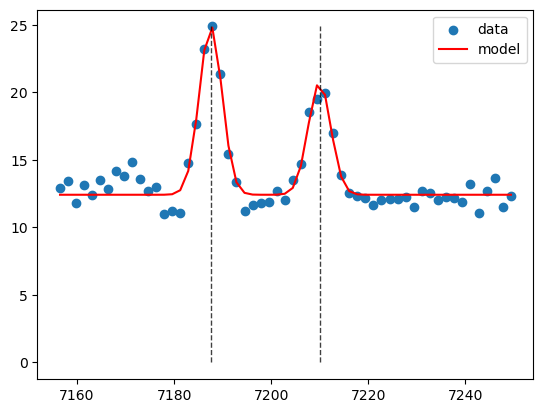

In [134]:
opt_p_,covm_ = fit(sub_wave,sub_flux,25,20,*means,1,5) # [0] is a1

In [153]:
wave_1_t_halpha = 6562.8
wave_2_t_nii= 6583

In [154]:
#writing a redshift func
def red(w0,wt):
    return (w0-wt)/wt

z_w1 = red(opt_p_[2],wave_1_t_halpha)
z_w2 = red(opt_p_[3],wave_2_t_nii)
print(f'Redshift from H alpha:{z_w1} and from Nitrogen doublet: {z_w2}')

Redshift from H alpha:0.0951901853395868 and from Nitrogen doublet: 0.09523703618010589


_Redshift matched with the sdss redshift_

# Thats all forks

<span>ping me for any query @ astrodingra@gmail.com</span>